#### imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
#from sklearn import test_train_split, random_forest

---

#### data
https://www.kaggle.com/datasets/advaitnmenon/network-traffic-data-malicious-activity-detection

##### tensorflow example
https://www.freecodecamp.org/news/binary-classification-made-simple-with-tensorflow/

---

### Reading in the data and data exploration

In [4]:
os.getcwd()

'C:\\Users\\speco\\USD\\intro_to_ai\\team-8\\spencer'

In [5]:
df = pd.read_csv(r'data/NandakumarMenonAdvait_MT_S2.csv')

In [6]:
df[:3]

,Time,Source,Destination,Protocol,Length,Source Port,Destination Port,bad_packet
0,0.000000,VMware_8a:60:5f,Broadcast,ARP,60,NaN,NaN,0
1,0.081233,VMware_8a:12:84,Broadcast,ARP,60,NaN,NaN,0
2,0.217863,VMware_8a:7e:e9,Broadcast,ARP,60,NaN,NaN,0


In [7]:
len(df)

3245180

In [8]:
df.Destination.unique()

array(['Broadcast', '192.167.5.22', '192.167.5.35', '192.167.255.255',
       '142.251.32.14', '192.232.16.204', 'VMware_8a:7f:3f',
       'VMware_8a:5c:e6', 'VMware_8a:aa:27'], dtype=object)

In [8]:
df.dtypes

Time                float64
Source               object
Destination          object
Protocol             object
Length                int64
Source Port         float64
Destination Port    float64
bad_packet            int64
dtype: object

In [17]:
df.corr()

,Time,Length,Source Port,Destination Port,bad_packet
Time,1.000000,-0.047309,-0.043687,0.029307,0.067949
Length,-0.047309,1.000000,-0.836410,0.906244,-0.717578
Source Port,-0.043687,-0.836410,1.000000,-0.930075,NaN
Destination Port,0.029307,0.906244,-0.930075,1.000000,NaN
bad_packet,0.067949,-0.717578,NaN,NaN,1.000000


<AxesSubplot:>

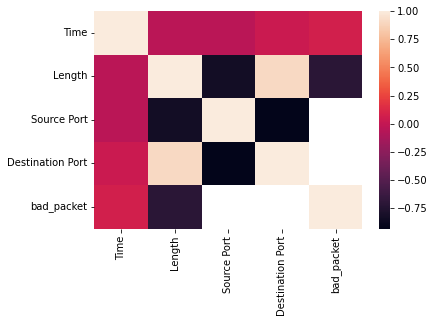

In [16]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Time', ylabel='Count'>

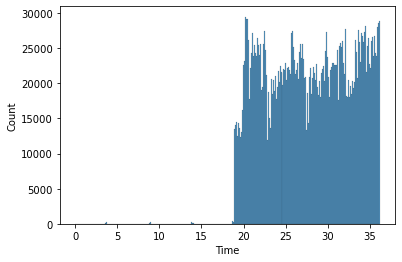

In [20]:
sns.histplot(df, x = 'Time')

In [27]:
df.Length.unique()

array([  60,   98,  239,  182, 1216, 1675,  131, 1466,  535,   85,   93,
         54,  827,  311,  130, 1448, 1514,  596,  226,  553, 1682, 1651,
        127,  538,  216,  640, 2420,  242,   42,  592,  615,  600,   92,
        543,  849,  425,   82,  186, 1381, 1301, 1446,  429, 1050,  228,
        752, 1481,  128,  116,  194,  215,  805, 2255,  244,  826,  742,
        325,  776,  126,  181,  545,  246, 1132,  110,  470,   66,  210,
       1084], dtype=int64)

In [32]:
df['str_length'] = df.Length.astype(str)

pd.DataFrame(df.groupby('str_length').str_length.count()).style

,str_length
str_length,
1050,1
1084,1
110,3
1132,1
116,1
1216,3
126,1
127,7
128,1


the string length is nearly always 42

(-1.0, 150.0)

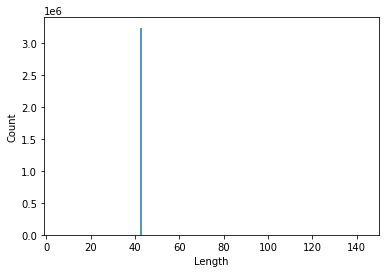

In [26]:
fig, ax = plt.subplots()
sns.histplot(df, 
             x = 'Length',
            binwidth = 1
            )
plt.xlim(-1, 150)

In [7]:
df['Source Port'].unique()

array([   nan,   138., 49734.,   443., 57914., 57912.,   137.])

In [11]:
encoded_df = pd.get_dummies(df)

In [13]:
encoded_df.shape

(3245180, 49)

---

### random forest classifier